# Tutorial 4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
import math
path = "../src/"
stud_perf = pd.read_csv(path + "data/student/student-mat.csv", sep=';')
stud_perf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Student Performance

### Task 1.1

$H_0$ No significant association found.

$H_1$ There is association between `address` and `paid`

In [22]:
tab = pd.crosstab(stud_perf.address, stud_perf.paid).to_numpy()
tab

array([[ 52,  36],
       [162, 145]])

In [23]:
stats.chi2_contingency(tab).pvalue
# p > 0.5 -> Independent

np.float64(0.353391383175218)

### Task 1.2

<Axes: xlabel='address'>

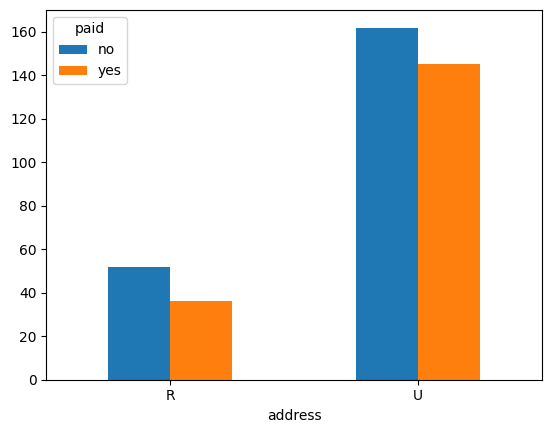

In [25]:
pd.crosstab(stud_perf.address, stud_perf.paid).plot(kind='bar', stacked=False, rot=1.0)

<Axes: xlabel='address'>

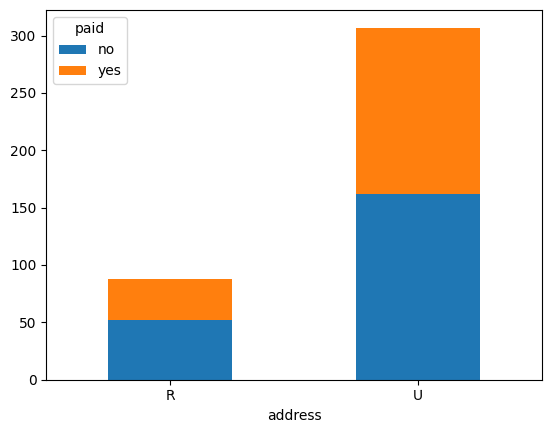

In [26]:
pd.crosstab(stud_perf.address, stud_perf.paid).plot(kind='bar', stacked=True, rot=1.0)

### Task 1.3

In [28]:
prop = pd.crosstab(stud_perf.address, stud_perf.paid, normalize='index')

In [ ]:
# tab is numpy array
prop2 = tab / tab.sum(axis=1).reshape((2,1))
prop2

array([[0.59090909, 0.40909091],
       [0.5276873 , 0.4723127 ]])

### Task 1.4

In [32]:
rr = prop2[0][1] / prop2[1][1]
rr

np.float64(0.8661442006269593)

### Task 1.5

Range of values for RR is $[0, +\infty]$, when the number of urban residents who paid for extra classes is zero, $RR \rightarrow +\infty$. Note that $$RR = \frac{\# \text{ of Yes, R} / \# \text{ of total}}{\# \text{ of Yes, U} / \# \text{ of total}}$$
While $$\text{Odds Ratio} = \frac{p_1 / (1-p_1)}{p_2 / (1-p_2)} = \frac{\# \text{ of Yes, U} / \# \text{ of No, U}}{\# \text{ of Yes, R} / \# \text{ of No, R}}$$, they are not same by defination.

### Task 1.6

In [58]:
stud_perf['LG'] = pd.cut(stud_perf.G3, [-1, 10, 12, 15, 18, 20], labels=['F', 'D', 'C', 'B', 'A'])
stud_perf

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,LG,letter_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,F,"(-2, 10]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,F,"(-2, 10]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,F,"(-2, 10]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,C,"(12, 15]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,F,"(-2, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,F,"(-2, 10]"
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,B,"(15, 18]"
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,F,"(-2, 10]"
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,F,"(-2, 10]"


### Task 1.7

In [81]:
start = stud_perf.columns.get_loc('famrel')
end = stud_perf.columns.get_loc('health')
for i in stud_perf.columns[start:end + 1]:
    kt = stats.kendalltau(stud_perf.letter_grade, stud_perf[i])
    print(i, kt.statistic)

famrel 0.027921345672482126
freetime -0.0068478948855573716
goout -0.12426083574168144
Dalc -0.11462943996525973
Walc -0.12960396275765426
health -0.027288629354030484


### Task 1.8

Mosaic plot reflects the count in each cell (through the area), along with the proportions of interest.

Walc    1   2   3   4  5
Dalc                    
1     150  65  42  15  4
2       1  18  29  22  5
3       0   1   8  11  6
4       0   1   1   3  4
5       0   0   0   0  9
[[150  65  42  15   4]
 [  1  18  29  22   5]
 [  0   1   8  11   6]
 [  0   1   1   3   4]
 [  0   0   0   0   9]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.5822784810126581,
   np.float64(0.479539641943734)),
  ('0', '1'): (0.0,
   np.float64(0.5089514066496164),
   0.5822784810126581,
   np.float64(0.20780051150895146)),
  ('0', '2'): (0.0,
   np.float64(0.7461636828644501),
   0.5822784810126581,
   np.float64(0.13427109974424553)),
  ('0', '3'): (0.0,
   np.float64(0.909846547314578),
   0.5822784810126581,
   np.float64(0.04795396419437342)),
  ('0', '4'): (0.0,
   np.float64(0.9872122762148339),
   0.5822784810126581,
   np.float64(0.0127877237851662)),
  ('1', '0'): (0.6239451476793249,
   np.float64(0.0),
   0.1582278481012658,
   np.float64(0.011764705882352943)),
  ('1', '1'): (0.6239451476793249,
   np.float64(0.0411764705882353),
   0.1582278481012658,
   np.float64(0.21176470588235297)),
  ('1', '2'): (0.6239451476793249,
   np.float64(0.2823529411764706),
   0.1582278481012658,
   np.float64(0.3411764705882353)),
  ('1', '3'): (0.6239451476793249

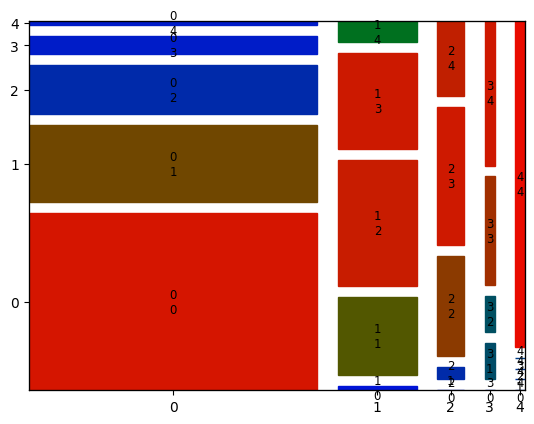

In [89]:
tab2 = pd.crosstab(stud_perf.Dalc, stud_perf.Walc)
print(tab2)
tab2 = pd.crosstab(stud_perf.Dalc, stud_perf.Walc).to_numpy()
print(tab2)
mosaic(tab2, statistic=True, gap=0.05)